In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

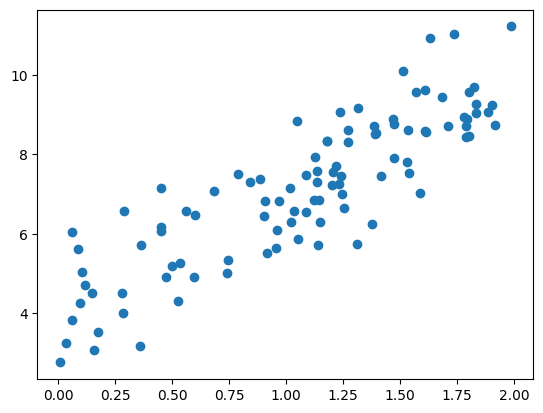

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X +np.random.randn(100,1) # here if you see m_value  = 3, b_value = 4
plt.scatter(X,y)

In [4]:
X_b = np.c_[np.ones((100,1)), X] # adds one to the X matrix
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.98756798],
       [2.93367883]])

In [5]:
# See above the m_value and b_value are 4.14398354, 2.87624769 almost equal to 4 and 3 
# lets predict it for new data

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # add's ones to each row at 1st place
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.98756798],
       [9.85492564]])

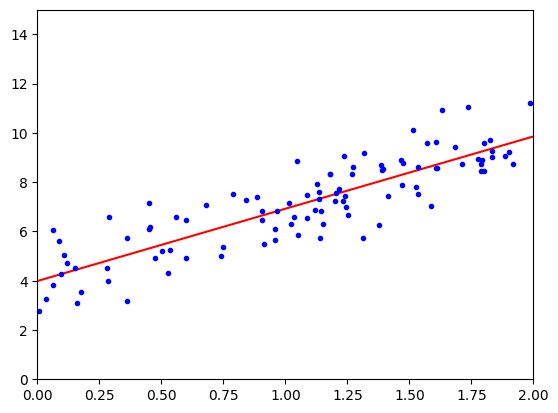

In [7]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)
lin_reg.predict(X_new)

[3.98756798] [[2.93367883]]


array([[3.98756798],
       [9.85492564]])

In [9]:
theta_best_svd,residuals,rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.98756798],
       [2.93367883]])

In [10]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) 

In [11]:
class MeraLR:
    def _init_(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # Claculating betas

        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + (self.intercept_)
        return y_pred
        # return np.dot(betas,X_test_)

In [12]:

lr = MeraLR()
lr.fit(X_train,y_train)

In [13]:
y_pred = lr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))
print(lr.intercept_)
print(lr.coef_)

0.43993386615689756
151.8833100525417
[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]


In [15]:
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [16]:
X,y = load_diabetes(return_X_y=True)

In [17]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [18]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [21]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [22]:
class MeraGD:

    def __init__(self,learning_rate = 0.01,epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        #init your coeff   
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # update the coef and intercepts
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            intercept_der = -2*(np.mean(y_train - y_hat))  # baiscally partial derivative of b0(Intercept)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der) # self.lr is n(eeta) remember this is not rows wala "n"

            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der )   

        print(self.intercept_,self.coef_)     

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + (self.intercept_)

In [23]:
gdr = MeraGD(learning_rate=0.5,epochs=1000)
gdr.fit(X_train,y_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [24]:
y_pred = gdr.predict(X_test)

In [25]:
r2_score(y_test,y_pred)

0.4534503034722803

In [26]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
gdr = MeraGD(learning_rate=0.6,epochs=1000)
gdr.fit(X_train,y_train)
y_pred = gdr.predict(X_test)
r2_score(y_test,y_pred)

151.98879593353988 [   7.81553013 -186.49510734  506.45449714  330.72279448  -45.79443697
 -123.85023287 -193.69457562   98.53559341  470.95977477   88.65520161]


0.4520736256827783

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_,lr.coef_)
lr.predict(X_test)
r2_score(y_test,y_pred)

151.88331005254167 [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]


0.4520736256827783

In [29]:
import seaborn as sns
tips =sns.load_dataset('tips')

tips['smoker'] = tips['smoker'].replace({
    'No' :0,
    'Yes' :1
})
tips['day'] = tips['day'].replace({
    'Sun' : 4,
    'Sat' : 3,
    'Fri' : 2,
    'Thur': 1    
})

C:\Users\hp\AppData\Local\Temp\ipykernel_31228\3752555039.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tips['smoker'] = tips['smoker'].replace({
C:\Users\hp\AppData\Local\Temp\ipykernel_31228\3752555039.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  tips['smoker'] = tips['smoker'].replace({
C:\Users\hp\AppData\Local\Temp\ipykernel_31228\3752555039.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. T

In [30]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
161,12.66,2.5,Male,0,4,Dinner,2


In [31]:
tips.drop(columns=['sex','time'], axis=1, inplace=True)
tips['smoker'] = tips['smoker'].astype(int)
x  = tips.iloc[0:,1:]
y = tips.iloc[0:,0]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.673307700734826

In [32]:
from sklearn.datasets import load_diabetes
x,y = load_diabetes(return_X_y=True)
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
class Mera_Ridge_multi:

    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        I = np.identity(x_train.shape[1])
        result = np.linalg.inv(np.dot(x_train.T,x_train) + self.alpha * I).dot(x_train.T).dot(y_train)
        self.intercept_ = result[0] 
        self.coef_ = result[1:]
        print(self.intercept_)
        print(self.coef_)

    def predict(self,x_test):
        return np.dot(X_test,self.coef_) + (self.intercept_)

In [34]:
mrm = Mera_Ridge_multi(alpha = 0.1)
mrm.fit(x_train,y_train)
y_pred = mrm.predict(x_test)
r2_score(y_test,y_pred)

151.88221592211522
[   6.64970105 -172.2493574   485.49941498  314.68335483  -72.93919534
  -80.6014393  -174.45279965   83.5733994   484.39865564   73.58483208]


0.4519719082031616

In [35]:
df = pd.read_csv('Concrete.csv')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [36]:
a = df.iloc[:,0:-1]
b = df.iloc[:,-1]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(a,b,test_size=0.2,random_state=2)

In [38]:
# Linear regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.570114265275778

In [39]:
# Ridge
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.5701142441710139

In [40]:
# Lasso
reg = Lasso(alpha=0.025)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.5700874651884803

In [41]:
# ElasticNet
reg = ElasticNet(alpha=0.00005,l1_ratio=0.5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.5701142342905287

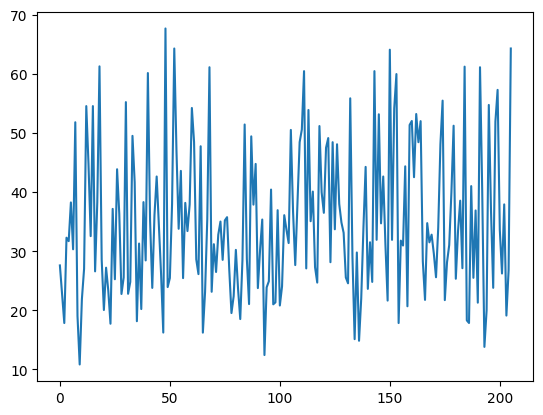

In [44]:
import matplotlib.pyplot as plt
plt.plot(y_pred)

<Axes: xlabel='x', ylabel='y'>

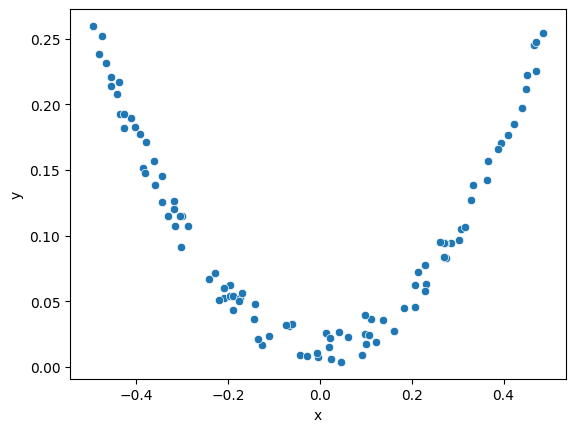

In [85]:
np.random.seed(42)
x = np.random.rand(100,1) - 0.5
y = x[:,0]**2 +0.03*(np.random.rand(100))
df = pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y
sns.scatterplot(x=df['x'],y=df['y'])